# **(Online retail sales JC)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Default.DESKTOP-QO1EVKV\\OneDrive\\Documents\\GitHubRepos\\OnlineRetailSalesJC\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Default.DESKTOP-QO1EVKV\\OneDrive\\Documents\\GitHubRepos\\OnlineRetailSalesJC'

# Section 1

Install & Import Necessary Libraries


Section 1 content

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


---

# Extract, Transform & Load (ETL) in Python

Load the Dataset with Your Initials (jc_)

---

In [12]:
jc_df = pd.read_csv(r"C:\\Users\Default.DESKTOP-QO1EVKV\\OneDrive\Documents\\GitHubRepos\\OnlineRetailSalesJC\\Online Retail.csv")

jc_df.info()
jc_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Next step isto start cleaning the data

In [13]:
missing_values = jc_df.isnull().sum()

print("\n Missing Values Before Cleaning:\n", missing_values)


 Missing Values Before Cleaning:
 InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


In [14]:
# 📌 2️⃣ Handle Missing Values
print("\n🔹 Checking for missing values...")
missing_values = jc_df.isnull().sum()
print("\n📌 Missing Values Before Cleaning:\n", missing_values)

# Drop rows where CustomerID is missing
jc_df.dropna(subset=["CustomerID"], inplace=True)

print("\n✅ Missing values handled! Updated missing value counts:\n", jc_df.isnull().sum())

# 📌 3️⃣ Convert Date Column
print("\n🔹 Converting InvoiceDate to DateTime format...")
jc_df["InvoiceDate"] = pd.to_datetime(jc_df["InvoiceDate"])

print("\n✅ Date conversion complete!")
print("\n📌 Sample Dates:\n", jc_df["InvoiceDate"].head())

# 📌 4️⃣ Remove Negative & Zero Quantities (Returns)
print("\n🔹 Removing returns (negative and zero quantities)...")
initial_count = jc_df.shape[0]
jc_df = jc_df[jc_df["Quantity"] > 0]
final_count = jc_df.shape[0]

print(f"\n✅ Removed {initial_count - final_count} rows with negative or zero quantities.")
print(f"📌 Remaining rows: {final_count}")

# 📌 5️⃣ Create TotalAmount Column
print("\n🔹 Creating TotalAmount column...")
jc_df["TotalAmount"] = jc_df["Quantity"] * jc_df["UnitPrice"]

print("\n✅ TotalAmount column created!")
print("\n📌 Sample TotalAmount values:\n", jc_df[["Quantity", "UnitPrice", "TotalAmount"]].head())

# 📌 6️⃣ Feature Engineering - Extract Time Features
print("\n🔹 Extracting time features (Year, Month, Day, Hour)...")
jc_df["Year"] = jc_df["InvoiceDate"].dt.year
jc_df["Month"] = jc_df["InvoiceDate"].dt.month
jc_df["Day"] = jc_df["InvoiceDate"].dt.day
jc_df["Hour"] = jc_df["InvoiceDate"].dt.hour

print("\n✅ Time features extracted!")
print("\n📌 Sample Date Features:\n", jc_df[["InvoiceDate", "Year", "Month", "Day", "Hour"]].head())

# 📌 7️⃣ Customer Segmentation (RFM Analysis)
print("\n🔹 Performing RFM Analysis...")
jc_latest_date = jc_df["InvoiceDate"].max()

jc_rfm = jc_df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (jc_latest_date - x.max()).days,  # Recency
    "InvoiceNo": "count",  # Frequency
    "TotalAmount": "sum"  # Monetary Value
})
jc_rfm.columns = ["Recency", "Frequency", "Monetary"]

print("\n✅ RFM Analysis Completed!")
print("\n📌 Sample RFM Data:\n", jc_rfm.head())

# 📌 8️⃣ Save Cleaned Data for Tableau
output_file = "jc_cleaned_retail_data.csv"
jc_df.to_csv(output_file, index=False)

print(f"\n✅ Data saved successfully as '{output_file}'! ")


🔹 Checking for missing values...

📌 Missing Values Before Cleaning:
 InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

✅ Missing values handled! Updated missing value counts:
 InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

🔹 Converting InvoiceDate to DateTime format...

✅ Date conversion complete!

📌 Sample Dates:
 0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

🔹 Removing returns (negative and zero quantities)...

✅ Removed 10624 rows with negative or zero quantities.
📌 Remaining rows: 531285

🔹 Creating TotalAmount column...

✅ TotalAmount column created!

📌 Sample TotalAmount values:
    Quantity  UnitPrice  TotalAmount
0  

Now I want to visualise the data

In [15]:
output_file = "jc_cleaned_retail_data.csv"
jc_df.to_csv(output_file, index=False)

print(f"\n✅ Data saved successfully as '{output_file}'! 🎉")



✅ Data saved successfully as 'jc_cleaned_retail_data.csv'! 🎉



🔹 Plotting Sales Trends...


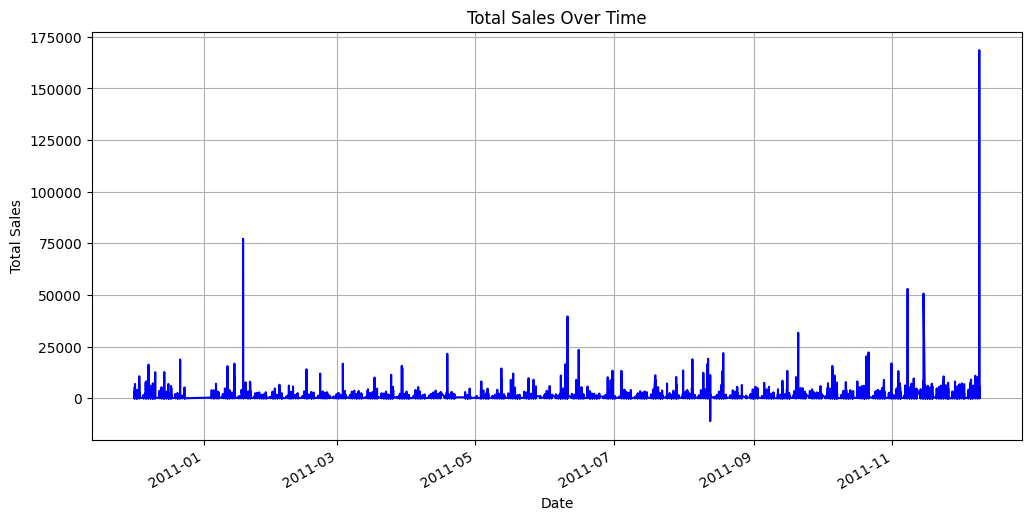

In [16]:
print("\n🔹 Plotting Sales Trends...")

plt.figure(figsize=(12, 6))
jc_df.groupby("InvoiceDate")["TotalAmount"].sum().plot(kind="line", color="blue")
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()



Top 10 Best-Selling Products


🔹 Plotting Top 10 Products...


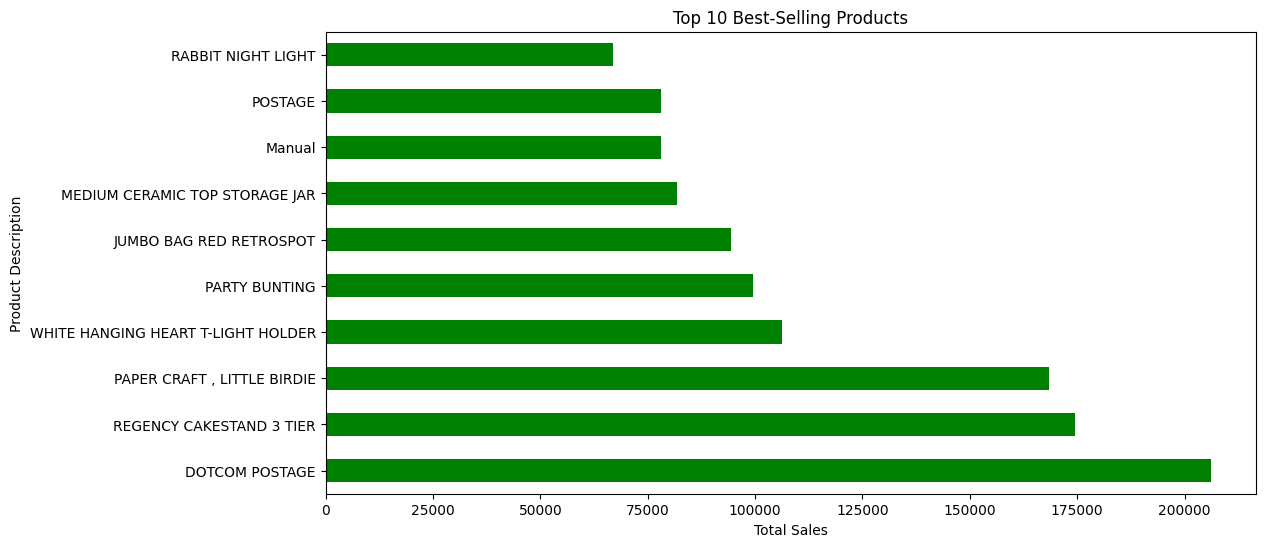

In [17]:
print("\n🔹 Plotting Top 10 Products...")

top_products = jc_df.groupby("Description")["TotalAmount"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind="barh", color="green")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Description")
plt.show()


NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
